In [1]:
'''
FEATURE
date: Date of Travel
Airline: Airline
ch_code: Character Code
num_code: Numerical Flight Code
dep_time: Departure Time
from: Source City
time_taken: Duration
stop: Stops
arr_time: Arrival Time
to: Destination City
price: Ticket Price
'''


#%%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer  
from sklearn.preprocessing import OneHotEncoder  

In [2]:
# 1. overall 
# 1.1 read file
raw_data = pd.read_csv('archive/economy.csv')

In [3]:
# 1.2 view overall
print('\n____________________________________ Dataset info ____________________________________')
print(raw_data.info())     
print('\n____________________________________ Some first data examples ____________________________________')
print(raw_data.head(6))            


____________________________________ Dataset info ____________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206774 entries, 0 to 206773
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        206774 non-null  object
 1   airline     206774 non-null  object
 2   ch_code     206774 non-null  object
 3   num_code    206774 non-null  int64 
 4   dep_time    206774 non-null  object
 5   from        206774 non-null  object
 6   time_taken  206774 non-null  object
 7   stop        206774 non-null  object
 8   arr_time    206774 non-null  object
 9   to          206774 non-null  object
 10  price       206774 non-null  object
dtypes: int64(1), object(10)
memory usage: 17.4+ MB
None

____________________________________ Some first data examples ____________________________________
         date   airline ch_code  num_code dep_time   from time_taken  \
0  11-02-2022  SpiceJet      SG      87


____________________________________ Dataset info ____________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206774 entries, 0 to 206773
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   airline         206774 non-null  object 
 1   ch_code         206774 non-null  object 
 2   num_code        206774 non-null  int64  
 3   dep_time        206774 non-null  int32  
 4   from            206774 non-null  object 
 5   time_taken      206770 non-null  float64
 6   stop            206774 non-null  object 
 7   arr_time        206774 non-null  int32  
 8   to              206774 non-null  object 
 9   price           206774 non-null  float32
 10  date_year       206774 non-null  int64  
 11  date_month      206774 non-null  int64  
 12  date_day        206774 non-null  int64  
 13  date_dayofweek  206774 non-null  int64  
dtypes: float32(1), float64(1), int32(2), int64(5), object(5)
mem

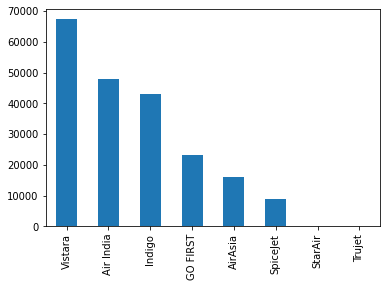

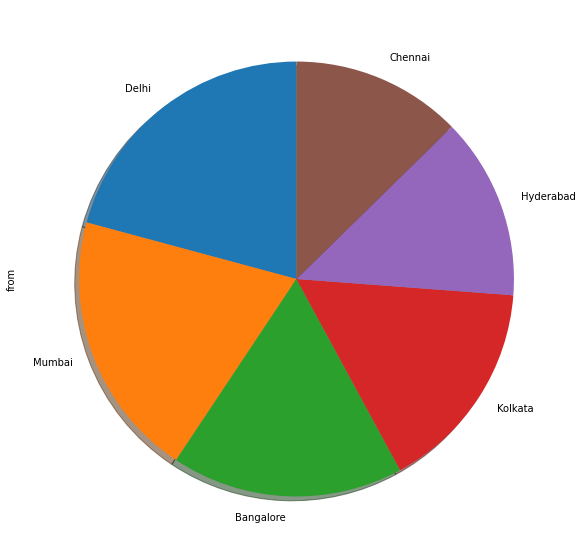

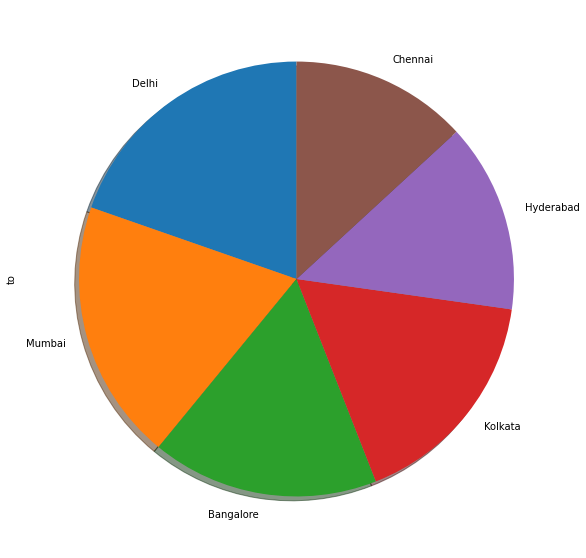


____________________________________ Describe feature ____________________________________


,num_code,dep_time,time_taken,arr_time,price,date_year,date_month,date_day,date_dayofweek
count,206774.000000,206774.000000,206770.000000,206774.000000,206774.000000,206774.0,206774.000000,206774.000000,206774.000000
mean,1706.096714,797.528195,692.753809,931.156867,6.571191,2022.0,2.669373,17.380754,2.955792
std,2320.463721,322.982410,434.529088,374.327548,3.743443,0.0,0.470440,8.104344,2.001241
min,101.000000,10.000000,50.000000,5.000000,1.105000,2022.0,2.000000,1.000000,0.000000
25%,588.000000,510.000000,375.000000,610.000000,4.173000,2022.0,2.000000,12.000000,1.000000
50%,818.000000,770.000000,610.000000,1020.000000,5.772000,2022.0,3.000000,18.000000,3.000000
75%,960.000000,1090.000000,915.000000,1245.000000,7.746000,2022.0,3.000000,24.000000,5.000000
max,9991.000000,1435.000000,2990.000000,1439.000000,42.348999,2022.0,3.000000,31.000000,6.000000


In [4]:
#1.3 Format data


# format date => 3 column year month day
raw_data['date']=pd.to_datetime(raw_data['date'],
        format='%d-%m-%Y', errors = 'coerce')
raw_data['date_year']=raw_data['date'].dt.year
raw_data['date_month']=raw_data['date'].dt.month
raw_data['date_day']=raw_data['date'].dt.day
raw_data['date_dayofweek'] = raw_data['date'].dt.dayofweek
raw_data.drop(columns=["date"],inplace=True)

# format dep_time and arr_time, time_taken => minute
time_arr = raw_data['dep_time'].str.split(':', expand=True).astype(int)
raw_data['dep_time']=time_arr[0]*60+time_arr[1]

time_arr = raw_data['arr_time'].str.split(':', expand=True).astype(int)
raw_data['arr_time']=time_arr[0]*60+time_arr[1]

time_arr= raw_data['time_taken'].str.split( expand=True)
raw_data['time_taken']= pd.to_numeric(time_arr[0].str.replace('h',''),downcast='integer')*60  +  pd.to_numeric(time_arr[1].str.replace('m',''),downcast='integer')


# convert price to float 
raw_data['price']= raw_data['price'].str.replace(',','.') #convert comma to dot
raw_data['price']=pd.to_numeric(raw_data['price'],downcast='float',errors='coerce')

# convert stop to int
#stop=raw_data['stop'].str.split('-|\+', expand=True)[0].str.replace('non','0')
#raw_data['stop']= pd.to_numeric(stop[0],downcast='integer',errors='coerce')
raw_data['stop']=raw_data['stop'].str.split('\t|\\n',expand=True)[0]

# overall again
print('\n____________________________________ Dataset info ____________________________________')
print(raw_data.info()) 
print('\n____________________________________ Data after format ____________________________________')
print(raw_data.head(6))  
print('\n____________________________________ Counts on a feature ____________________________________')
raw_data['airline'].value_counts().plot(kind='bar')
plt.show()
raw_data['from'].value_counts().plot(kind='pie',subplots=True, shadow = True,startangle=90,figsize=(15,10))
plt.show()
raw_data['to'].value_counts().plot(kind='pie',subplots=True, shadow = True,startangle=90,figsize=(15,10))
plt.show()
print('\n____________________________________ Describe feature ____________________________________')
raw_data.describe()

                num_code  dep_time  time_taken  arr_time     price  date_year  \
num_code        1.000000 -0.011472   -0.124905  0.004817 -0.090911        NaN   
dep_time       -0.011472  1.000000    0.099101 -0.141238 -0.048536        NaN   
time_taken     -0.124905  0.099101    1.000000 -0.000375  0.288620        NaN   
arr_time        0.004817 -0.141238   -0.000375  1.000000  0.115534        NaN   
price          -0.090911 -0.048536    0.288620  0.115534  1.000000        NaN   
date_year            NaN       NaN         NaN       NaN       NaN        NaN   
date_month     -0.001783  0.003015   -0.042377 -0.027977 -0.576669        NaN   
date_day       -0.012126 -0.001862   -0.002047 -0.007871  0.003532        NaN   
date_dayofweek  0.009045  0.002436    0.013315  0.004442  0.079849        NaN   

                date_month  date_day  date_dayofweek  
num_code         -0.001783 -0.012126        0.009045  
dep_time          0.003015 -0.001862        0.002436  
time_taken       -0.0423

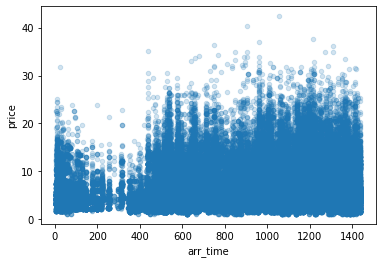

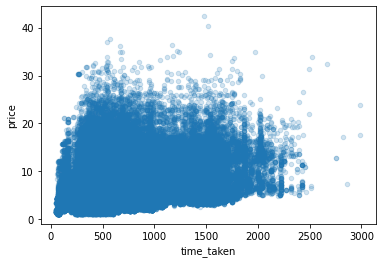

In [5]:
# 1.3 Compute correlations b/w features
corr_matrix = raw_data.corr()
print(corr_matrix) # print correlation matrix
print('__________sort corrmatrix__________')
print(corr_matrix["price"].sort_values(ascending=False)) # print correlation b/w a feature and other features

raw_data.drop(columns=["date_year"],inplace=True)   #corr low
raw_data.drop(columns=['ch_code','num_code'],inplace=True) # drop id
    
# 1.4 Scatter plot b/w 2 features
if 1:
    raw_data.plot(kind="scatter", y="price", x="arr_time", alpha=0.2)
    #plt.axis([0, 5, 0, 10000])
    #plt.savefig('figures/scatter_2_feat.png', format='png', dpi=300)
    plt.show()
if 1:
    raw_data.plot(kind="scatter", y="price", x="time_taken", alpha=0.2)
    #plt.axis([0, 5, 0, 10000])
    #plt.savefig('figures/scatter_1_feat.png', format='png', dpi=300)
    plt.show()    

In [6]:
# 2. Pre process
# 2.1 Split data
train_set, test_set = train_test_split(raw_data, test_size=0.2, random_state=42)
print('\n____________________________________ Split training an test set ____________________________________')     
print(len(train_set), "train +", len(test_set), "test examples")
print('\n training set ')     
print(train_set.head(4))
print('\n test set ')     
print(test_set.head(4))


# 2.2 Separate labels from data, since we do not process label values
train_set_labels = train_set["price"].copy()
train_set = train_set.drop(columns = "price") 
test_set_labels = test_set["price"].copy()
test_set = test_set.drop(columns = "price") 


# 2.3 Define name columns
num_feat_names = ['dep_time', 'time_taken','arr_time','date_month','date_day','date_dayofweek'] 
cat_feat_names = ['airline', 'from', 'to','stop']

# 2.4 Define ColumnSelector: a transformer for choosing columns
class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_names):
        self.feature_names = feature_names
    def fit(self, dataframe, labels=None):
        return self
    def transform(self, dataframe):
        return dataframe[self.feature_names].values 

# 2.5 Pipeline for object features
cat_pipeline = Pipeline([
    ('selector', ColumnSelector(cat_feat_names)),   # select column
    ('imputer', SimpleImputer(missing_values=np.nan, 
        strategy="constant", fill_value = "NO INFO",
        copy=True)), # complete missing values. copy=False: imputation will be done in-place 
    ('cat_encoder', OneHotEncoder()) # convert categorical data into one-hot vectors
    ])    

# 2.6 Pipeline for numerical features
num_pipeline = Pipeline([
    ('selector', ColumnSelector(num_feat_names)), # select column
    ('imputer', SimpleImputer(missing_values=np.nan, 
        strategy="median", copy=True)), # copy=False: imputation will be done in-place 
    ('std_scaler', StandardScaler(with_mean=True, 
        with_std=True, copy=True)) # Scale features to zero mean and unit variance
    ])  

# 2.7 Combine features transformed by two above pipelines
full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline) ])  

# 2.8 Run the pipeline to process training data           
processed_train_set_val = full_pipeline.fit_transform(train_set)
print('\n____________________________________ Processed feature values ____________________________________')
print(processed_train_set_val[[0, 1, 2],:].toarray())
print(processed_train_set_val.shape)


____________________________________ Split training an test set ____________________________________
165419 train + 41355 test examples

 training set 
          airline  dep_time       from  time_taken       stop  arr_time  \
108582   GO FIRST       930  Bangalore       150.0  non-stop       1080   
89036    GO FIRST       490  Bangalore       505.0     1-stop       995   
36737   Air India      1080      Delhi      1015.0     1-stop       655   
177246     Indigo      1130  Hyderabad        75.0  non-stop       1205   

             to   price  date_month  date_day  date_dayofweek  
108582  Kolkata   3.845           3        24               3  
89036     Delhi   4.028           3         8               1  
36737   Chennai  11.520           2        22               1  
177246  Chennai   4.453           2        23               2  

 test set 
          airline  dep_time     from  time_taken       stop  arr_time  \
81260      Indigo       860   Mumbai       295.0     1-stop      1

In [7]:
# 3. TRAIN AND EVALUATE MODELS 
new_training=0
# 3.1 Try LinearRegression model
# 3.1.1 Store models to files, to compare latter
#from sklearn.externals import joblib 
import joblib # new lib
def store_model(model, model_name = ""):
    # NOTE: sklearn.joblib faster than pickle of Python
    # INFO: can store only ONE object in a file
    if model_name == "": 
        model_name = type(model).__name__
    joblib.dump(model,'models_economy/' + model_name + '_model.pkl')
def load_model(model_name):
    # Load objects into memory
    #del model
    model = joblib.load('models_economy/' + model_name + '_model.pkl')
    #print(model)
    return model
# 3.1.2 Compute R2 score and root mean squared error
def r2score_and_rmse(model, train_data, labels): 
    r2score = model.score(train_data, labels)
    from sklearn.metrics import mean_squared_error
    prediction = model.predict(train_data)
    mse = mean_squared_error(labels, prediction)
    rmse = np.sqrt(mse)
    return r2score, rmse  


# 3.1.3 Training: learn a linear regression hypothesis using training data 
from sklearn.linear_model import LinearRegression
if new_training:
    model = LinearRegression()
    model.fit(processed_train_set_val, train_set_labels)
    store_model(model,'LinearRegression')
else:
    model = load_model('LinearRegression')
print('\n____________________________________ LinearRegression ____________________________________')
print('Learned parameters: \n', model.coef_)
# Compute R2 score and root mean squared error
r2score, rmse = r2score_and_rmse(model, processed_train_set_val, train_set_labels)
print('R2 score (on training data, best=1):', r2score)
print("Root Mean Square Error: ", rmse.round(decimals=1))
# 3.1.3 Predict labels for some training instances
print("Input data: \n", train_set.iloc[0:9])
print("Predictions: ", model.predict(processed_train_set_val[0:9]).round(decimals=1))
print("Labels:      ", list(train_set_labels[0:9]))


____________________________________ LinearRegression ____________________________________
Learned parameters: 
 [-0.13243916  0.20576118  0.13981199 -2.24686994 -0.56801383  0.21626956
  1.15211084 -1.56620186  0.2027804  -0.05631013  0.18053999  0.9314022
 -2.55568508  1.71136364  0.02586858 -0.12908147 -0.09163839 -0.47035788
  1.00271699 -0.33750783  0.08573721 -0.15956744  0.06194696 -0.57631201
  0.74078885 -0.15259357  0.05080653  1.90585128 -1.95665781]
R2 score (on training data, best=1): 0.5454856225697192
Root Mean Square Error:  2.5
Input data: 
           airline  dep_time       from  time_taken       stop  arr_time  \
108582   GO FIRST       930  Bangalore       150.0  non-stop       1080   
89036    GO FIRST       490  Bangalore       505.0     1-stop       995   
36737   Air India      1080      Delhi      1015.0     1-stop       655   
177246     Indigo      1130  Hyderabad        75.0  non-stop       1205   
96567     Vistara       690  Bangalore       515.0     1-st

In [8]:
# 3.2 Try DecisionTreeRegressor model
# Training
from sklearn.tree import DecisionTreeRegressor
if new_training:
    model = DecisionTreeRegressor()
    model.fit(processed_train_set_val, train_set_labels)
    store_model(model,'DecisionTreeRegressor')      
else:
    model = load_model("DecisionTreeRegressor")
# Compute R2 score and root mean squared error
print('\n____________________________________ DecisionTreeRegressor ____________________________________')
r2score, rmse = r2score_and_rmse(model, processed_train_set_val, train_set_labels)
print('R2 score (on training data, best=1):', r2score)
print("Root Mean Square Error: ", rmse.round(decimals=1))
# Predict labels for some training instances
#print("Input data: \n", train_set.iloc[0:9])
print("Predictions: ", model.predict(processed_train_set_val[0:9]).round(decimals=1))
print("Labels:      ", list(train_set_labels[0:9]))


____________________________________ DecisionTreeRegressor ____________________________________
R2 score (on training data, best=1): 0.9988366034800562
Root Mean Square Error:  0.1
Predictions:  [ 3.8  4.  11.5  4.5  7.2  9.6  5.8  3.4  9.1]
Labels:       [3.8450000286102295, 4.0279998779296875, 11.520000457763672, 4.453000068664551, 7.211999893188477, 9.638999938964844, 5.822999954223633, 3.378999948501587, 9.140999794006348]


In [9]:
# 3.3 Try RandomForestRegressor model
# Training (NOTE: may take time if train_set is large)
from sklearn.ensemble import RandomForestRegressor
if new_training:
    model = RandomForestRegressor(n_estimators = 5, random_state=42) # n_estimators: no. of trees
    model.fit(processed_train_set_val, train_set_labels)
    store_model(model,'RandomForestRegressor')      
else:
    model = load_model("RandomForestRegressor")

# Compute R2 score and root mean squared error
print('\n____________________________________ RandomForestRegressor ____________________________________')
r2score, rmse = r2score_and_rmse(model, processed_train_set_val, train_set_labels)
print('R2 score (on training data, best=1):', r2score)
print("Root Mean Square Error: ", rmse.round(decimals=1))
# Predict labels for some training instances
#print("Input data: \n", train_set.iloc[0:9])
print("Predictions: ", model.predict(processed_train_set_val[0:9]).round(decimals=1))
print("Labels:      ", list(train_set_labels[0:9]))


____________________________________ RandomForestRegressor ____________________________________
R2 score (on training data, best=1): 0.968845220933845
Root Mean Square Error:  0.7
Predictions:  [ 3.8  4.  11.5  4.5  7.1 10.1  5.8  3.4  9.1]
Labels:       [3.8450000286102295, 4.0279998779296875, 11.520000457763672, 4.453000068664551, 7.211999893188477, 9.638999938964844, 5.822999954223633, 3.378999948501587, 9.140999794006348]


In [10]:
# 3.4 Try polinomial regression model
# NOTE: polinomial regression can be treated as (multivariate) linear regression where high-degree features x1^2, x2^2, x1*x2... are seen as new features x3, x4, x5... 
# hence, to do polinomial regression, we add high-degree features to the data, then call linear regression
# 3.4.1 Training. NOTE: may take a while 
from sklearn.preprocessing import PolynomialFeatures
poly_feat_adder = PolynomialFeatures(degree = 2) # add high-degree features to the data
train_set_poly_added = poly_feat_adder.fit_transform(processed_train_set_val)
if new_training:
    model = LinearRegression()
    model.fit(train_set_poly_added, train_set_labels)
    store_model(model, model_name = "PolinomialRegression")      
else:
    model = load_model("PolinomialRegression")
# 3.4.2 Compute R2 score and root mean squared error
print('\n____________________________________ Polinomial regression ____________________________________')
r2score, rmse = r2score_and_rmse(model, train_set_poly_added, train_set_labels)
print('R2 score (on training data, best=1):', r2score)
print("Root Mean Square Error: ", rmse.round(decimals=1))
# 3.4.3 Predict labels for some training instances
print("Predictions: ", model.predict(train_set_poly_added[0:9]).round(decimals=1))
print("Labels:      ", list(train_set_labels[0:9]))


____________________________________ Polinomial regression ____________________________________
R2 score (on training data, best=1): 0.681750739280847
Root Mean Square Error:  2.1
Predictions:  [ 5.1  5.1 10.   3.6  9.4 11.6  5.8  2.8 12.8]
Labels:       [3.8450000286102295, 4.0279998779296875, 11.520000457763672, 4.453000068664551, 7.211999893188477, 9.638999938964844, 5.822999954223633, 3.378999948501587, 9.140999794006348]


In [11]:
# 4.2 Evaluate with K-fold cross validation 
from sklearn.model_selection import cross_val_score 
from statistics import mean

print('\n____________________________________ K-fold cross validation ____________________________________')

run_evaluation = 0
if run_evaluation:
    # Evaluate LinearRegression
    model_name = "LinearRegression" 
    model = LinearRegression()             
    nmse_scores = cross_val_score(model, processed_train_set_val, train_set_labels, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-nmse_scores)
    joblib.dump(rmse_scores,'models_economy/' + model_name + '_rmse.pkl')
    print("LinearRegression rmse: ", rmse_scores.round(decimals=1))

    # Evaluate DecisionTreeRegressor
    model_name = "DecisionTreeRegressor" 
    model = DecisionTreeRegressor()
    nmse_scores = cross_val_score(model, processed_train_set_val, train_set_labels, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-nmse_scores)
    joblib.dump(rmse_scores,'models_economy/' + model_name + '_rmse.pkl')
    print("DecisionTreeRegressor rmse: ", rmse_scores.round(decimals=1))

    # Evaluate RandomForestRegressor
    model_name = "RandomForestRegressor" 
    model = RandomForestRegressor()
    nmse_scores = cross_val_score(model, processed_train_set_val, train_set_labels, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-nmse_scores)
    joblib.dump(rmse_scores,'models_economy/' + model_name + '_rmse.pkl')
    print("RandomForestRegressor rmse: ", rmse_scores.round(decimals=1))
    
    # Evaluate Polinomial regression
    model_name = "PolinomialRegression" 
    model = LinearRegression()
    nmse_scores = cross_val_score(model, train_set_poly_added, train_set_labels, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-nmse_scores)
    joblib.dump(rmse_scores,'models_economy/' + model_name + '_rmse.pkl')
    print("Polinomial regression rmse: ", rmse_scores.round(decimals=1))
else:
    # Load rmse
    model_name = "LinearRegression" 
    rmse_scores = joblib.load('models_economy/' + model_name + '_rmse.pkl')
    print("LinearRegression rmse: ", rmse_scores.round(decimals=1))
    print("Avg. rmse: ", mean(rmse_scores.round(decimals=1)),'\n')

    model_name = "DecisionTreeRegressor" 
    rmse_scores = joblib.load('models_economy/' + model_name + '_rmse.pkl')
    print("DecisionTreeRegressor rmse: ", rmse_scores.round(decimals=1))
    print("Avg. rmse: ", mean(rmse_scores.round(decimals=1)),'\n')

    model_name = "RandomForestRegressor" 
    rmse_scores = joblib.load('models_economy/' + model_name + '_rmse.pkl')
    print("RandomForestRegressor rmse: ", rmse_scores.round(decimals=1))
    print("Avg. rmse: ", mean(rmse_scores.round(decimals=1)),'\n')

    model_name = "PolinomialRegression" 
    rmse_scores = joblib.load('models_economy/' + model_name + '_rmse.pkl')
    print("Polinomial regression rmse: ", rmse_scores.round(decimals=1))
    print("Avg. rmse: ", mean(rmse_scores.round(decimals=1)),'\n')


____________________________________ K-fold cross validation ____________________________________
LinearRegression rmse:  [2.5 2.5 2.5 2.5 2.5]
Avg. rmse:  2.5 

DecisionTreeRegressor rmse:  [1.8 1.7 1.8 1.7 1.8]
Avg. rmse:  1.76 

RandomForestRegressor rmse:  [1.3 1.3 1.3 1.3 1.3]
Avg. rmse:  1.3 

Polinomial regression rmse:  [2.1 2.1 2.1 2.1 2.1]
Avg. rmse:  2.1 




____________________________________ Random ForestRegressor With Test Set____________________________________
Input : 
           airline  dep_time       from  time_taken       stop  arr_time  \
81260      Indigo       860     Mumbai       295.0     1-stop      1155   
36726     Vistara      1240      Delhi       910.0     1-stop       710   
135553  Air India       930    Kolkata       345.0     1-stop      1275   
50358      Indigo       605     Mumbai       130.0  non-stop        735   
162314    Vistara       460  Hyderabad       785.0     1-stop      1245   
115574   GO FIRST       515  Bangalore       635.0     1-stop      1150   
167752     Indigo       985  Hyderabad       335.0     1-stop      1320   
192282  Air India       965    Chennai       130.0  non-stop       1095   
94392   Air India       625  Bangalore       575.0     1-stop      1200   

               to  date_month  date_day  date_dayofweek  
81260     Chennai           3        12               5  
36726     Ch

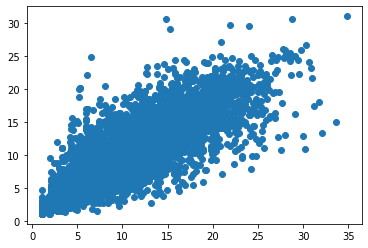

In [12]:
# 4. Statistic

processed_test_set_val = full_pipeline.fit_transform(test_set)

# 4.1 RandomForestRegressor with test set
# Training (NOTE: may take time if train_set is large)
if new_training:
    model = RandomForestRegressor(n_estimators = 5, random_state=42) # n_estimators: no. of trees
    model.fit(processed_train_set_val, train_set_labels)
    store_model(model,'RandomForestRegressor')      
else:
    model = load_model("RandomForestRegressor")

# Compute R2 score and root mean squared error
print('\n____________________________________ Random ForestRegressor With Test Set____________________________________')
# Predict labels for some training instances
print("Input : \n", test_set.iloc[0:9])
print("Predictions: ", model.predict(processed_test_set_val[0:9]).round(decimals=1))
print("Labels:      ", list(test_set_labels[0:9].round(decimals=1)))

# statistic
r2score, rmse = r2score_and_rmse(model, processed_test_set_val, test_set_labels)
print('R2 score (on training data, best=1):', r2score)
print("Root Mean Square Error: ", rmse.round(decimals=1))
plt.scatter(test_set_labels,model.predict(processed_test_set_val),cmap='viridis')


____________________________________ Decision Tree Regressor With Test Set ____________________________________
Predictions:  [ 4.8 11.5  5.1  2.7  3.5  4.9  3.1  1.8 20.5]
Labels:       [3.5, 11.5, 5.5, 2.700000047683716, 3.5, 5.400000095367432, 3.0999999046325684, 1.7999999523162842, 22.200000762939453]
R2 score (on training data, best=1): 0.8008324072914911
Root Mean Square Error:  1.7


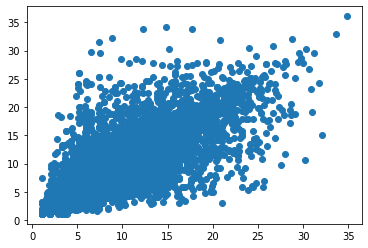

In [13]:
# 4.2 DecisionTreeRegressor with test set
# Training
if new_training:
    model = DecisionTreeRegressor()
    model.fit(processed_train_set_val, train_set_labels)
    store_model(model,'DecisionTreeRegressor')      
else:
    model = load_model("DecisionTreeRegressor")
# Compute R2 score and root mean squared error
print('\n____________________________________ Decision Tree Regressor With Test Set ____________________________________')
# Predict labels for some training instances
# print("Input : \n", test_set.iloc[0:9])
print("Predictions: ", model.predict(processed_test_set_val[0:9]).round(decimals=1))
print("Labels:      ", list(test_set_labels[0:9].round(decimals=1)))

# statistic
r2score, rmse = r2score_and_rmse(model, processed_test_set_val, test_set_labels)
print('R2 score (on training data, best=1):', r2score)
print("Root Mean Square Error: ", rmse.round(decimals=1))
plt.scatter(test_set_labels,model.predict(processed_test_set_val), cmap='viridis')